In [1]:
! kaggle datasets download -d cashutosh/gender-classification-dataset

401 - Unauthorized - Unauthenticated


In [2]:
from zipfile import ZipFile

data_zip = './gender-classification-dataset.zip'

with ZipFile(data_zip, 'r') as zip:
    zip.extractall()
    print(str(data_zip), " is extracted")

./gender-classification-dataset.zip  is extracted


In [2]:
import os
os.environ['TF_CPP_LOG_LEVLE'] = '3'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as ming
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import models, layers
import random
%load_ext autotime

import warnings
warnings.filterwarnings('ignore')

time: 0 ns (started: 2024-02-22 19:09:38 +03:00)


In [3]:
gpu_dev = tf.config.list_physical_devices("GPU")
if gpu_dev:
    for gpu in gpu_dev:
        print(f'Device name {gpu.name}')
        print(f'Device type: {gpu.device_type}') 

Device name /physical_device:GPU:0
Device type: GPU
time: 703 ms (started: 2024-02-22 19:09:44 +03:00)


In [59]:
IMG_HIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 128
EPOCHS = 10

time: 0 ns (started: 2024-02-22 19:50:58 +03:00)


In [5]:
train_ds_path = './Training/'
valid_ds_path = './Validation/'

time: 0 ns (started: 2024-02-22 19:10:13 +03:00)


In [10]:
count = 0
data_dir = os.listdir('./Training/')
for dir in data_dir:
    files = list(os.listdir('Training/' + dir))
    print(dir, ' with '+ str(len(files)) + ' images')
    count = count + len(files)
print(f'The total images in Training folder : {str(count)}')

female  with 23243 images
male  with 23766 images
The total images in Training folder : 47009
time: 16 ms (started: 2024-02-22 19:18:04 +03:00)


In [11]:
count = 0
data_dir = os.listdir('./Validation/')
for dir in data_dir:
    files = list(os.listdir('Validation/' + dir))
    print(dir, ' with '+ str(len(files))+ ' images')
    count = count + len(files)
print(f'The total images in Validation folder: {str(count)}')

female  with 5841 images
male  with 5808 images
The total images in Validation folder: 11649
time: 0 ns (started: 2024-02-22 19:20:57 +03:00)


In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_ds_path,
    shuffle=True,
    image_size=(IMG_HIGHT, IMG_WIDTH),
    batch_size= BATCH_SIZE,
    validation_split=False
)

Found 47009 files belonging to 2 classes.
time: 4.05 s (started: 2024-02-22 19:13:00 +03:00)


In [8]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
    directory=valid_ds_path,
    shuffle=False,
    image_size=(IMG_HIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    validation_split=False
)

Found 11649 files belonging to 2 classes.
time: 922 ms (started: 2024-02-22 19:14:11 +03:00)


In [12]:
gender_class = train_ds.class_names
gender_class

['female', 'male']

time: 0 ns (started: 2024-02-22 19:21:46 +03:00)


In [13]:
def show_img(data_path, data_class, set_name):
    idx_plot = 1
    idx_rand = random.randrange(254)
    plt.figure(figsize=(6, 6))
    plt.suptitle(str(set_name))
    for i in os.listdir(data_path):
        img = load_img((data_path +i) + '/' + os.listdir(data_path + i)[idx_rand])
        plt.subplot(1, len(data_class), idx_plot)
        plt.imshow(img)
        plt.axis('off')
        plt.title(i)
        idx_plot = idx_plot + 1


time: 16 ms (started: 2024-02-22 19:21:58 +03:00)


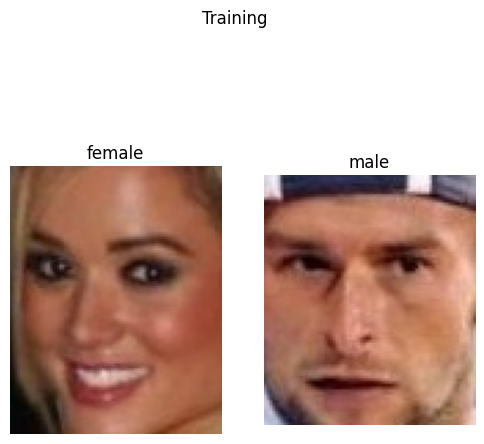

time: 172 ms (started: 2024-02-22 19:22:20 +03:00)


In [20]:
show_img(data_path=train_ds_path, data_class=gender_class, set_name='Training')

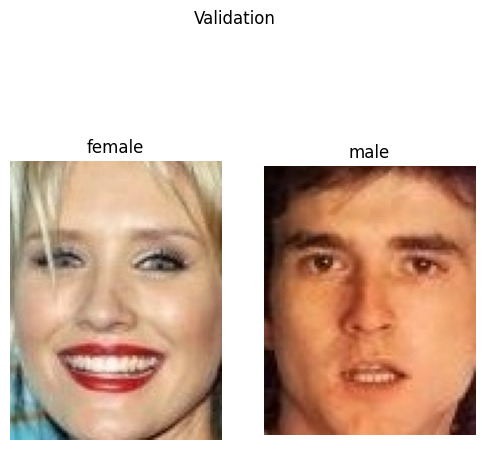

time: 172 ms (started: 2024-02-22 19:22:23 +03:00)


In [22]:
show_img(data_path=valid_ds_path, data_class=gender_class, set_name='Validation')

In [24]:
model = models.Sequential()

time: 0 ns (started: 2024-02-22 19:23:46 +03:00)


In [40]:
data_aug = models.Sequential([
    tf.keras.layers.RandomFlip('horizontal', input_shape=(IMG_HIGHT, IMG_WIDTH, 3))
])

time: 47 ms (started: 2024-02-22 19:30:13 +03:00)


In [56]:
model = models.Sequential([
    data_aug,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(len(gender_class), activation='softmax')

])

time: 156 ms (started: 2024-02-22 19:50:33 +03:00)


In [74]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

time: 16 ms (started: 2024-02-22 19:56:09 +03:00)


In [75]:
history = model.fit(x = train_ds, validation_data=valid_ds, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/10


1470/1470 [==============================] - 58s 39ms/step - loss: 0.2467 - accuracy: 0.9005 - val_loss: 0.1398 - val_accuracy: 0.9455
Epoch 2/10
1470/1470 [==============================] - 56s 38ms/step - loss: 0.1447 - accuracy: 0.9502 - val_loss: 0.1301 - val_accuracy: 0.9507
Epoch 3/10
1470/1470 [==============================] - 56s 38ms/step - loss: 0.1263 - accuracy: 0.9560 - val_loss: 0.1756 - val_accuracy: 0.9409
Epoch 4/10
1470/1470 [==============================] - 56s 38ms/step - loss: 0.1193 - accuracy: 0.9587 - val_loss: 0.1465 - val_accuracy: 0.9412
Epoch 5/10
1470/1470 [==============================] - 56s 38ms/step - loss: 0.1102 - accuracy: 0.9617 - val_loss: 0.1376 - val_accuracy: 0.9449
Epoch 6/10
1470/1470 [==============================] - 57s 38ms/step - loss: 0.1062 - accuracy: 0.9634 - val_loss: 0.1055 - val_accuracy: 0.9645
Epoch 7/10
1470/1470 [==============================] - 55s 37ms/step - loss: 0.0994 - accuracy: 0.9666 - val_loss: 0.1051 - val_accura

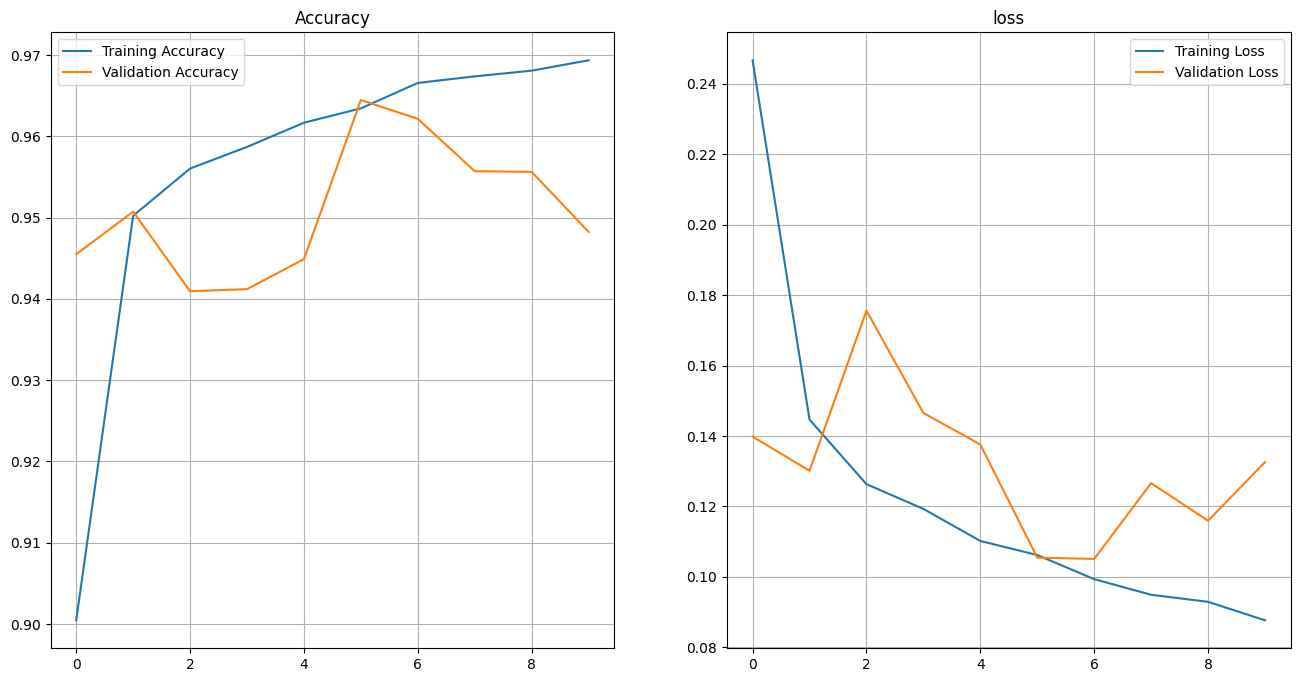

time: 359 ms (started: 2024-02-22 20:32:45 +03:00)


In [76]:
epcohs_range = range(EPOCHS)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epcohs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epcohs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epcohs_range, history.history['loss'], label='Training Loss')
plt.plot(epcohs_range, history.history['val_loss'], label='Validation Loss')
plt.title('loss')
plt.legend()
plt.grid()

In [95]:
model.save('model_1.h5')

time: 125 ms (started: 2024-02-22 20:56:24 +03:00)


In [91]:
img = 'pexels-anna-shvets-4226462.jpg'
img = tf.keras.utils.load_img(img, target_size=(IMG_HIGHT, IMG_WIDTH))
img_to_array = tf.keras.utils.img_to_array(img)
img_dims = tf.expand_dims(img_to_array, 0)

time: 15 ms (started: 2024-02-22 20:45:29 +03:00)


In [92]:
pred = model.predict(img_dims)

1/1 [==============================] - 0s 25ms/step
time: 62 ms (started: 2024-02-22 20:45:30 +03:00)


(-0.5, 63.5, 63.5, -0.5)

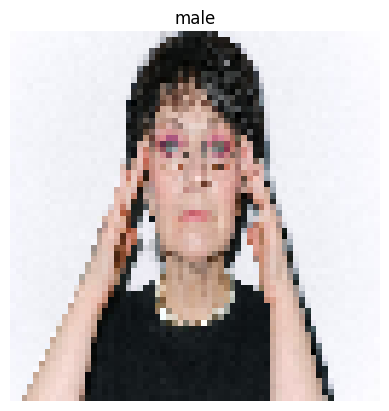

time: 78 ms (started: 2024-02-22 20:45:33 +03:00)


In [94]:
result = tf.nn.softmax(pred[0])
plt.imshow(img)
plt.title(gender_class[np.argmax(result)])
plt.axis('off')